(60000, 28, 28)
(60000,)
(60000, 10)


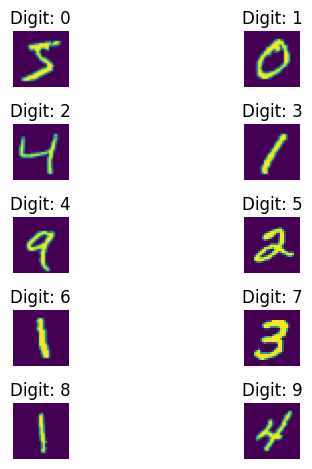

In [ ]:
import keras
import cv2

from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
x_train= x_train.reshape(60000,28,28)

x_test= x_test.reshape(x_test.shape[0],28,28)

input_shape=(28,28,1)

y_train=keras.utils.to_categorical(y_train,10)#one hot encoding
print(y_train.shape)
y_test=keras.utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

for i in range(10):
    plt.subplot(5, 2, i + 1)  # Create a subplot for each digit (5 rows, 2 columns)
    plt.imshow(x_train[i])  # Display the image in grayscale
    plt.title(f"Digit: {i}")  # Optionally add a title to indicate the digit
    plt.axis('off')  # Turn off axis to make the display cleaner
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()  # Display the plot


In [ ]:
# Normalize the data to range [0, 1] for better model performance
x_train /= 255
x_test /= 255

# Define model parameters
batch_size = 64
num_classes = 10
epochs = 2

# Function to build and compile a CNN model with a specified optimizer
def build_model(optimizer):
    # Initialize a Sequential model
    model = Sequential()

    # Add a Conv2D layer with 32 filters, kernel size (3x3), ReLU activation, and input shape (28, 28, 1)
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

    # Add a MaxPooling layer to downsample the feature maps
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add another Conv2D layer with similar parameters
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

    # Add another MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add a Dropout layer with a rate of 0.25 to reduce overfitting
    model.add(Dropout(0.25))

    # Flatten the 2D feature maps into a 1D vector for the Dense layers
    model.add(Flatten())

    # Add a Dense (fully connected) layer with 256 units and ReLU activation
    model.add(Dense(256, activation='relu'))

    # Add another Dropout layer with a higher rate (0.5) for better regularization
    model.add(Dropout(0.5))

    # Add an output Dense layer with `num_classes` units and softmax activation for classification
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model with categorical crossentropy loss, specified optimizer, and accuracy metric
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

    # Print a summary of the model's architecture
    model.summary()

    return model

# List of optimizers to try (not used in this code snippet but can be iterated over)
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']

# Build a model with the Adam optimizer
model = build_model('Adam')

# Visualize the model architecture and save it as an image file
from keras.utils import plot_model  # Use plot_model to generate a visual representation of the model
plot_model(model, to_file="mnist_model.jpg", show_shapes=True)

# Train the model on the training data, validate on test data
hist = model.fit(
    x_train, y_train,  # Training data and labels
    batch_size=batch_size,  # Mini-batch size
    epochs=epochs,  # Number of epochs (iterations over the entire dataset)
    verbose=1,  # Print progress during training
    validation_data=(x_test, y_test)  # Use test data for validation
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,194 (848.41 KB)

 Trainable params: 217,194 (848.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 51ms/step - accuracy: 0.3762 - loss: 1.7292 - val_accuracy: 0.8877 - val_loss: 0.3938
Epoch 2/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.8364 - loss: 0.5231 - val_accuracy: 0.9320 - val_loss: 0.2373


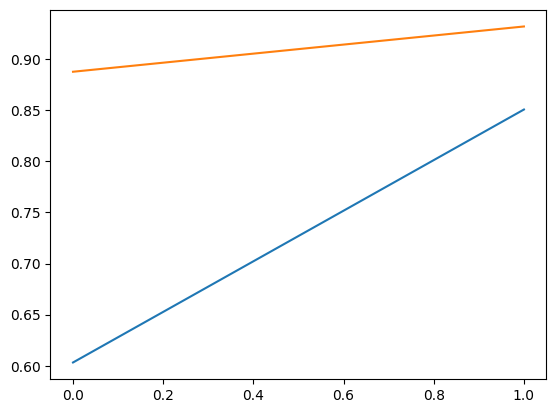

In [ ]:
y1=hist.history['accuracy']
y2=hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

In [ ]:
keras.models.save_model(model, "mnist.h5", save_format="h5")
#m=model.save('/content/mymodel',include_optimizer=True)

from tensorflow.keras.models import load_model
import numpy as np



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1


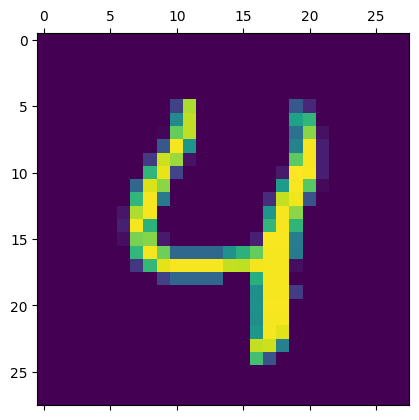

In [ ]:
import numpy as np
img= x_test[4]
#.reshape(len(x_test[0]),28)
#img = cv2.resize(img, (28,28))
img= np.reshape(img,(1,28,28))
img = img.astype('float32')
img= img/255


pred=model.predict(img)
answer = np.argmax(pred)
print(answer)
plt.matshow(x_test[4])